In [2]:
from src import *

Frames: 10001 N: 10 Unique maps: 362


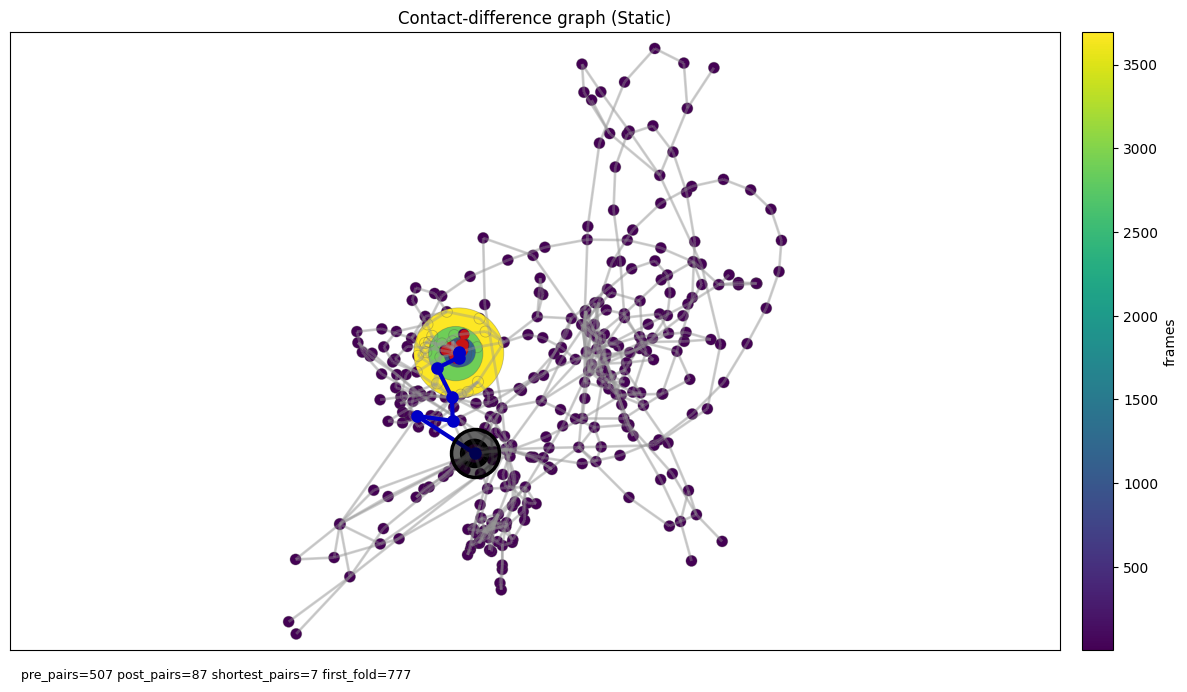

In [3]:
pdb = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.pdb"
xtc = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.xtc"

contact_maps = topology.get_contact_maps(top=pdb, traj=xtc)
unique_maps, frame_to_uid, inds = topology.get_unique_maps(contact_maps)

G, counter, node_counts = graphs.build_temporal_transition_graph(frame_to_uid, inds, keep_self_loops=False)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False)

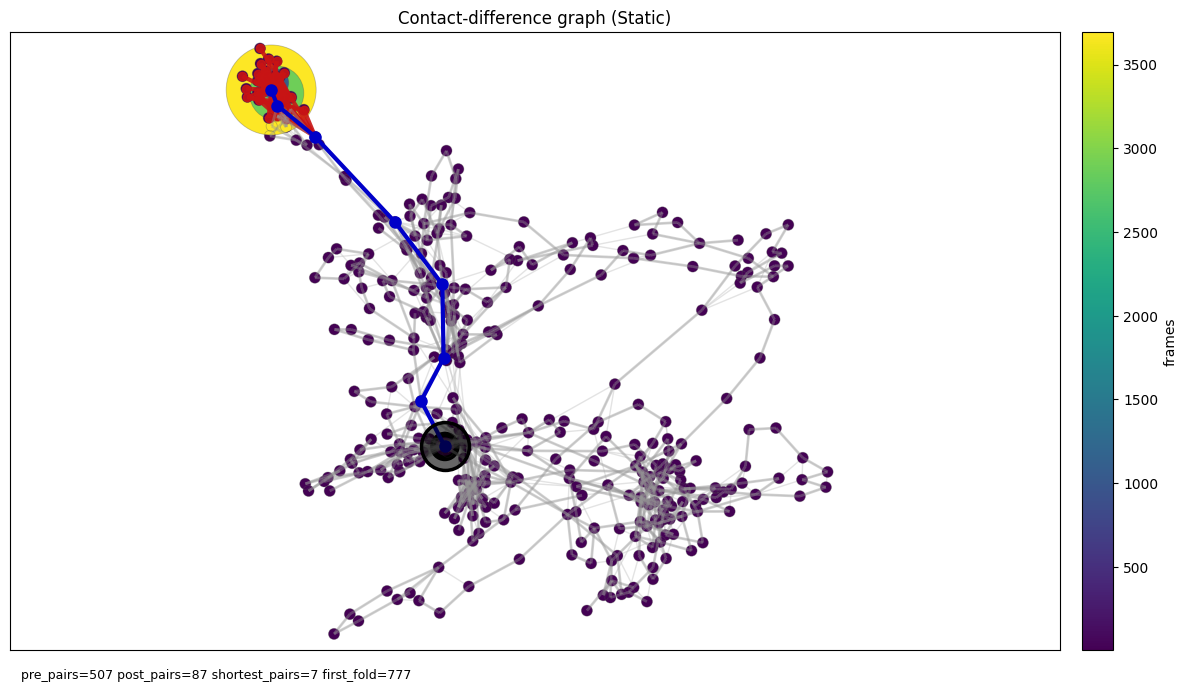

In [3]:
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False)

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


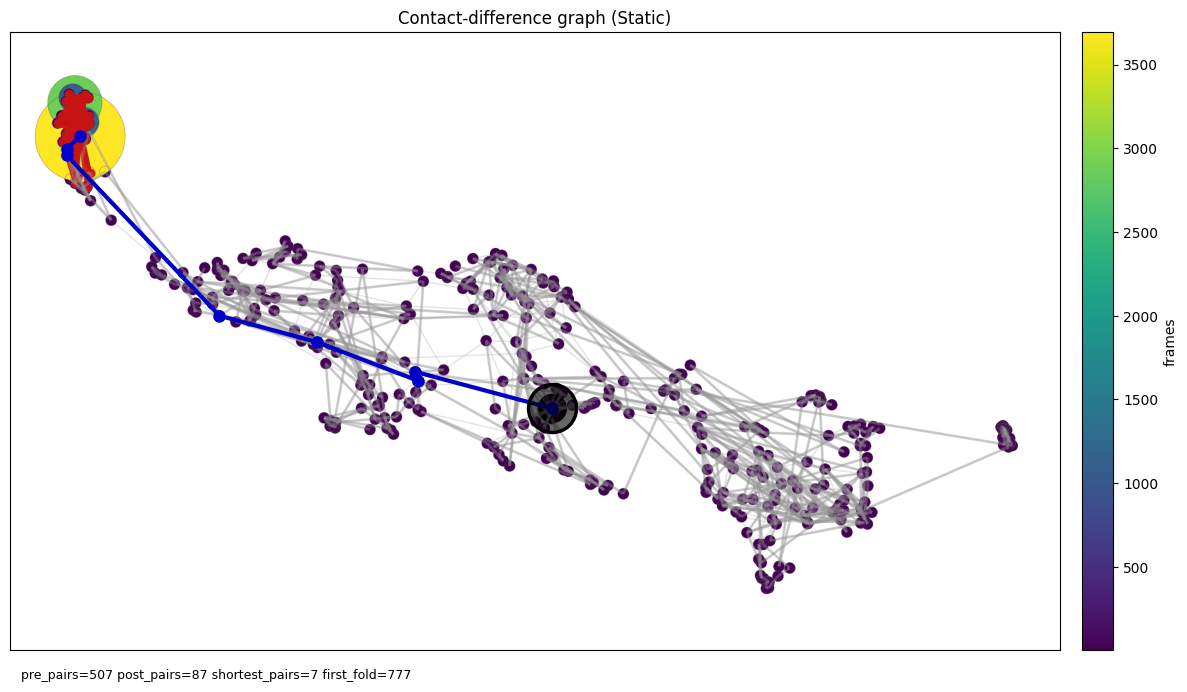

In [15]:
flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)

def embed_flat_bits(flat_bits, method='umap', n_components=2, n_neighbors=15, random_state=42):
    """
    embed flat_bits (U, Mbits) -> X_emb (U,2)
    Prefer UMAP if available, else Isomap, else SpectralEmbedding, else PCA.
    """
    U = flat_bits.shape[0]
    method = method.lower()
    X = flat_bits.astype(float)  # scikit-learn expects float arrays
    if method == 'umap' and _has_umap:
        reducer = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, random_state=random_state)
        X_emb = reducer.fit_transform(X)
        return X_emb
    if method == 'isomap':
        iso = Isomap(n_components=n_components, n_neighbors=max(5, min(n_neighbors, U-1)))
        X_emb = iso.fit_transform(X)
        return X_emb
    if method == 'spectral':
        sp = SpectralEmbedding(n_components=n_components, n_neighbors=max(5, min(n_neighbors, U-1)))
        X_emb = sp.fit_transform(X)
        return X_emb
    # fallback PCA for extreme cases
    pca = PCA(n_components=n_components, random_state=random_state)
    X_emb = pca.fit_transform(X)
    return X_emb

_has_umap = True
import umap
X_emb = embed_flat_bits(flat_bits, method='umap', n_neighbors=15)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


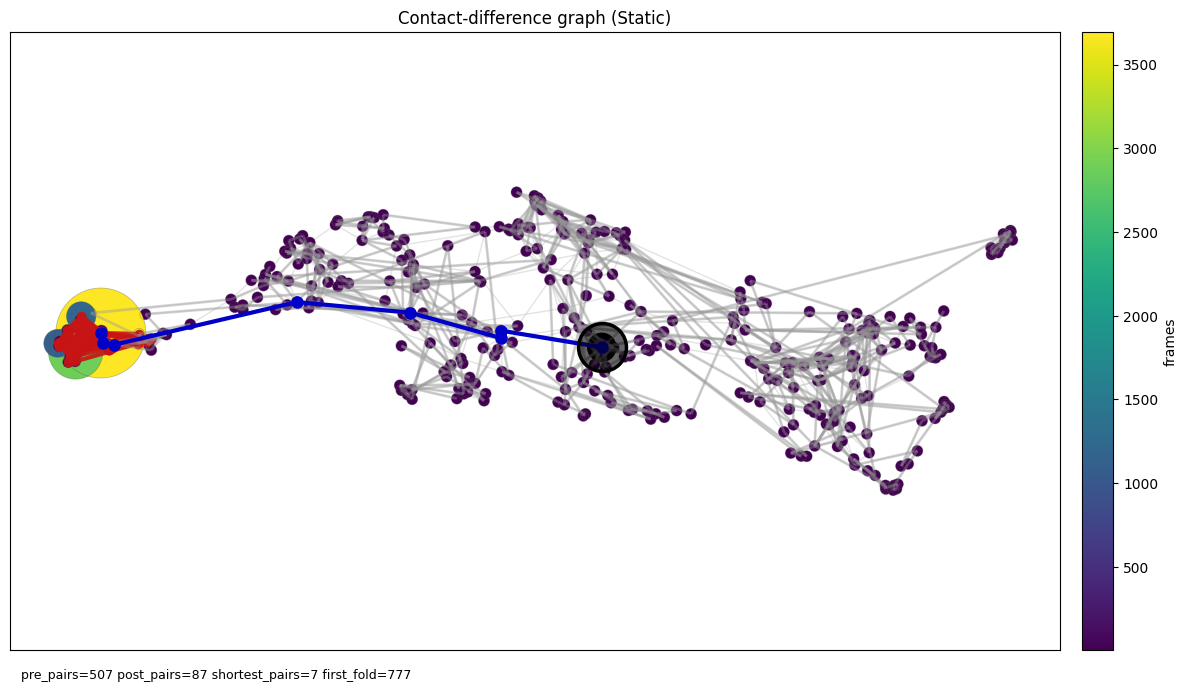

In [4]:
flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
X_emb, pca = clustering.embed_flat_bits(flat_bits, pca_n=45, umap_n=2)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


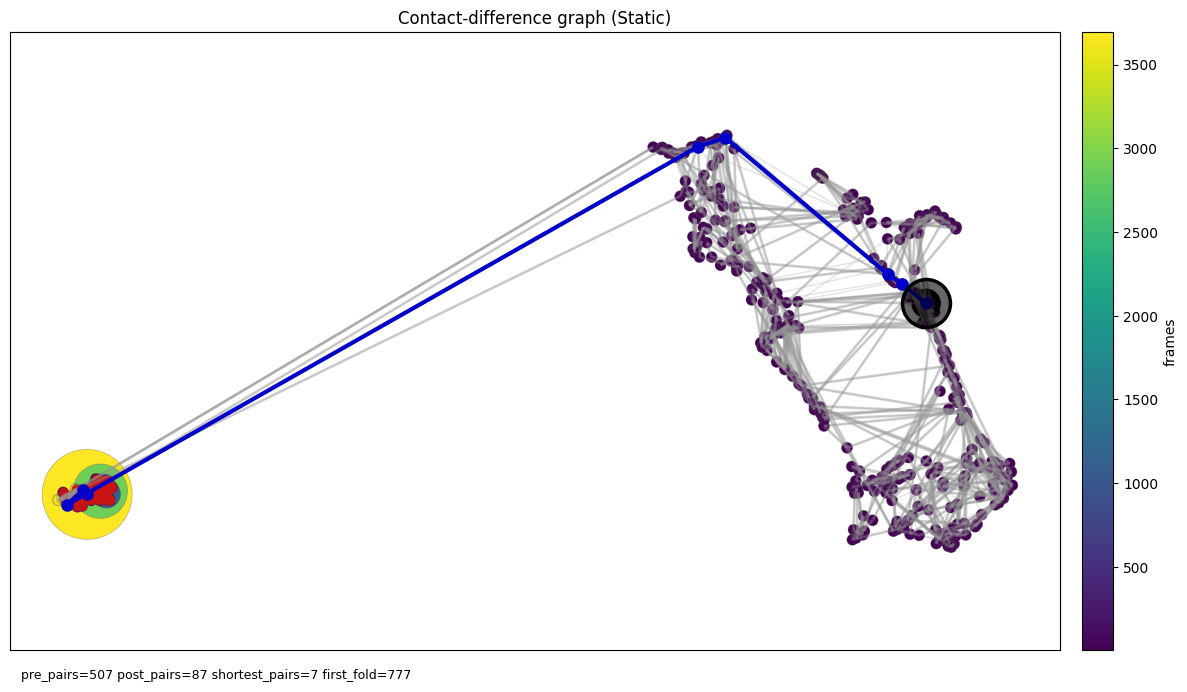

In [28]:
X_emb, pca = clustering.embed_flat_bits(flat_bits, pca_n=5, umap_n=2)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/skl

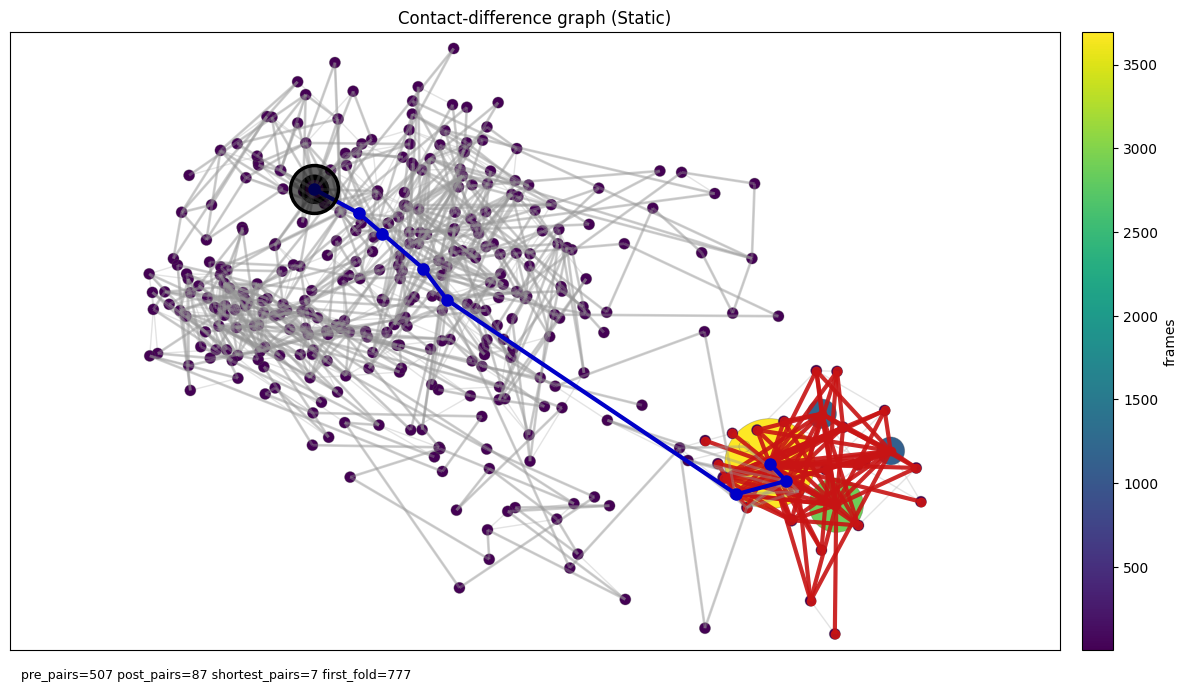

In [5]:
X_emb, labels, D = clustering.embed_and_cluster_by_hamming(ints,
                                 n_components=10,
                                 embed_method='mds',   # 'mds' or 'spectral'
                                 cluster_method='agglomerative',  # 'agglomerative' or 'hdbscan'
                                 n_clusters=None,      # only for agglomerative
                                 random_state=42,
                                 warn_threshold=4000)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)

In [10]:
import networkx as nx
import numpy as np

map_uid = frame_to_uid
F = len(map_uid)
frame_counts = plotting.ensure_frame_counts(G, map_uid)

start_node = int(map_uid[0]) if 0 <= 0 < F else int(map_uid[0])
folded_node = int(np.argmax(frame_counts))

# Assuming G is your merged graph and shortest_nodes is the path
shortest_nodes = nx.shortest_path(G, source=start_node, target=folded_node)

max_dist = 0
long_edge = None

for i in range(len(shortest_nodes)-1):
    u, v = shortest_nodes[i], shortest_nodes[i+1]
    
    # Calculate visual distance (Euclidean distance on the plot)
    pos_u = np.array(pos[u])
    pos_v = np.array(pos[v])
    visual_dist = np.linalg.norm(pos_u - pos_v)
    
    # Calculate physical distance (Hamming)
    # If using 'ints' from previous steps:
    # val_u, val_v = ints[u], ints[v]
    # hamming_dist = (val_u ^ val_v).bit_count() 
    
    # Or just check graph weight if stored:
    # weight = G[u][v].get('weight', 1) 
    
    print(f"Edge {u}->{v}: Visual Length={visual_dist:.2f}")

    if visual_dist > max_dist:
        max_dist = visual_dist
        long_edge = (u, v)

print(f"\nLongest visual edge is {long_edge}. Likely a Manifold Edge (Hamming=1).")

Edge 0->5: Visual Length=0.87
Edge 5->216: Visual Length=0.53
Edge 216->295: Visual Length=0.93
Edge 295->228: Visual Length=0.67
Edge 228->332: Visual Length=6.00
Edge 332->334: Visual Length=0.89
Edge 334->337: Visual Length=0.41

Longest visual edge is (228, 332). Likely a Manifold Edge (Hamming=1).


In [13]:
# Assuming 'ints' is your list of integer contact maps
# and Mbits is the total number of bits (contacts)

val_228 = ints[228]
val_332 = ints[332]

# XOR finds the bit that is different
diff = val_228 ^ val_332

# Find which bit position it is (0 to Mbits-1)
bit_pos = diff.bit_length() - 1

print(f"The Wormhole is Bit #{bit_pos}")
print(f"Node 228 has bit {bit_pos}: {'YES' if (val_228 & (1<<bit_pos)) else 'NO'}")
print(f"Node 332 has bit {bit_pos}: {'YES' if (val_332 & (1<<bit_pos)) else 'NO'}")

The Wormhole is Bit #22
Node 228 has bit 22: NO
Node 332 has bit 22: YES


In [16]:
import numpy as np

def get_residue_pair_from_bit(bit_index, n_residues=None, total_bits=None):
    """
    Converts a flat bit index back to (i, j) residue coordinates 
    assuming standard upper-triangle flattening (row-major).
    
    Args:
        bit_index (int): The index of the bit (e.g. 22).
        n_residues (int): The number of residues/beads in the protein.
                          If None, calculated from total_bits.
        total_bits (int): Total length of the bit vector (Mbits).
                          Used to calculate n_residues if not provided.
    """
    # 1. Calculate N if not provided
    if n_residues is None:
        if total_bits is None:
            raise ValueError("Must provide either n_residues or total_bits")
        # Inverse of L = N(N-1)/2  -->  N^2 - N - 2L = 0
        # N = (1 + sqrt(1 + 8L)) / 2
        n_residues = int((1 + np.sqrt(1 + 8 * total_bits)) / 2)

    # 2. Find the pair (i, j)
    # We iterate rows. Row i has (N - 1 - i) elements.
    current_idx = bit_index
    for i in range(n_residues):
        row_length = (n_residues - 1) - i
        if current_idx < row_length:
            # Found the row! The column is just the offset + (i + 1)
            j = i + 1 + current_idx
            return (i, j)
        current_idx -= row_length
        
    raise ValueError(f"Bit index {bit_index} out of bounds for N={n_residues}")

# --- USAGE EXAMPLE ---

# Example: If your "Wormhole" was Bit #22
bit_idx = 22

# You need to know EITHER the number of residues OR the total bits (Mbits)
# Let's say your protein has 100 residues
res_pair = get_residue_pair_from_bit(bit_idx, n_residues=10)

print(f"Bit #{bit_idx} corresponds to residue pair: {res_pair}")
# For N=100, Row 0 has 99 items (indices 0-98). 
# So Bit 22 is simply pair (0, 23) (since 0+1+22 = 23).

Bit #22 corresponds to residue pair: (2, 8)


In [19]:
import py3Dmol

def view_wormhole_contact(pdb_file, res_index_a, res_index_b, offset=1):
    """
    Visualizes a specific contact pair on a protein structure.
    
    Args:
        pdb_file (str): Path to your PDB file (or PDB ID).
        res_index_a (int): 0-based index of first residue (from your calculation).
        res_index_b (int): 0-based index of second residue.
        offset (int): conversion from 0-based array to PDB numbering (usually 1).
    """
    
    # Convert 0-based indices to PDB IDs
    pdb_res_a = res_index_a + offset
    pdb_res_b = res_index_b + offset
    
    # Selection string for py3Dmol (e.g., "3,9")
    sel_str = f"{pdb_res_a},{pdb_res_b}"
    
    print(f"Visualizing Python indices {res_index_a} & {res_index_b}")
    print(f"Mapping to PDB Residue IDs {pdb_res_a} & {pdb_res_b}")

    # Initialize Viewer
    view = py3Dmol.view(width=800, height=600)
    
    # Load Data
    # If using a local file, read it into a string
    try:
        with open(pdb_file, 'r') as f:
            pdb_data = f.read()
        view.addModel(pdb_data, 'pdb')
    except FileNotFoundError:
        print(f"File {pdb_file} not found. Trying as PDB ID...")
        view.addModel(pdb_file, 'pdb') # Try loading as simple ID if file fails
        
    # 1. Base Style: Cartoon (White/Grey or Spectrum)
    # We make it translucent (opacity 0.7) so the sticks pop out more
    view.setStyle({'cartoon': {'color': 'white', 'opacity': 0.8}})
    
    # 2. Highlight Style: Sticks for the specific pair
    # We select ONLY the two residues involved
    view.addStyle({'resi': [pdb_res_a, pdb_res_b]}, 
                  {'stick': {'colorscheme': 'redCarbon', 'radius': 0.3}})
    
    # 3. Label the residues (Optional but helpful)
    view.addLabel(f"Res {pdb_res_a}", {'fontSize':12, 'fontColor':'black', 'backgroundColor':'white'}, 
                  {'resi': pdb_res_a})
    view.addLabel(f"Res {pdb_res_b}", {'fontSize':12, 'fontColor':'black', 'backgroundColor':'white'}, 
                  {'resi': pdb_res_b})

    # Zoom to center
    view.zoomTo()
    
    # Show
    return view

# --- RUN THE VISUALIZATION ---

# 1. Set the residues you found (0-based)
res1 = 2
res2 = 8

# 2. Run the viewer
# Replace 'structure.pdb' with your actual filename
view = view_wormhole_contact(pdb, res1, res2, offset=1)
view.show()

Visualizing Python indices 2 & 8
Mapping to PDB Residue IDs 3 & 9


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [25]:
import mdtraj as md

# 1. Get the representative frame index for Node 228
# (Assuming you have your 'unique_indices' or similar mapping)
frame_idx = inds[228]
print(f"Node 228 represents Frame #{frame_idx} of the simulation.")

# 2. Load JUST that frame
# Replace 'trajectory.xtc' and 'topology.pdb' with your files
traj_228 = md.load_frame(xtc, index=frame_idx, top=pdb)

# 3. Measure the distance between Res 2 and Res 8 in THIS frame
# Note: MDTraj uses 0-based indexing
pairs = [[2, 8]]
dist_228 = md.compute_contacts(traj_228, contacts=pairs)[0][0]

print(f"Distance in Node 228: {dist_228[0]*10:.2f} Angstroms") # x10 to convert nm to Angstrom

# SAME FOR 332
frame_idx = inds[332]
print(f"Node 332 represents Frame #{frame_idx} of the simulation.")
traj_332 = md.load_frame(xtc, index=frame_idx, top=pdb)

pairs = [[2, 8]]
dist_332 = md.compute_contacts(traj_332, contacts=pairs)[0][0]

print(f"Distance in Node 332: {dist_332[0]*10:.2f} Angstroms") # x10 to convert nm to Angstrom


# 4. Measure the distance in the Native PDB for comparison
native = md.load(pdb)
dist_native = md.compute_contacts(native, contacts=pairs)[0][0]

print(f"Distance in Native PDB: {dist_native[0]*10:.2f} Angstroms")

Node 228 represents Frame #600 of the simulation.
Distance in Node 228: 8.55 Angstroms
Node 332 represents Frame #763 of the simulation.
Distance in Node 332: 5.90 Angstroms
Distance in Native PDB: 5.06 Angstroms


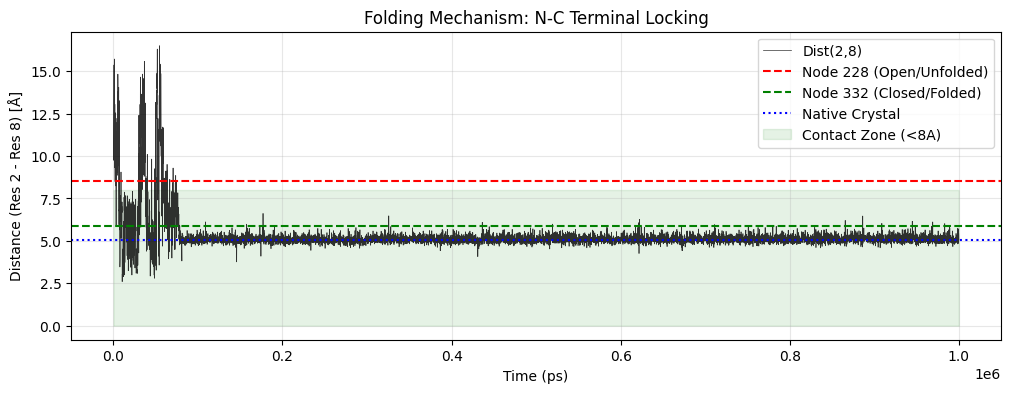

In [26]:
import mdtraj as md
import matplotlib.pyplot as plt

# 1. Load trajectory
traj = md.load(xtc, top=pdb)

# 2. Compute distance of the critical pair (2, 8)
# Note: mdtraj uses 0-based indexing
pairs = [[2, 8]]
distances = md.compute_contacts(traj, contacts=pairs)[0][:, 0] * 10  # Convert nm to Angstroms

# 3. Plot
plt.figure(figsize=(12, 4))
plt.plot(traj.time, distances, color='black', linewidth=0.5, alpha=0.8, label='Dist(2,8)')

# Add threshold lines based on your findings
plt.axhline(y=8.55, color='red', linestyle='--', label='Node 228 (Open/Unfolded)')
plt.axhline(y=5.90, color='green', linestyle='--', label='Node 332 (Closed/Folded)')
plt.axhline(y=5.06, color='blue', linestyle=':', label='Native Crystal')

# Aesthetic details
plt.fill_between(traj.time, 0, 8.0, color='green', alpha=0.1, label='Contact Zone (<8A)')
plt.xlabel("Time (ps)")
plt.ylabel("Distance (Res 2 - Res 8) [Å]")
plt.title("Folding Mechanism: N-C Terminal Locking")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.show()

In [ ]:
import numpy as np
import networkx as nx

def detect_transition_edges(G, pos, shortest_path_nodes, threshold_sigma=2.0):
    """
    Identifies 'Transition Edges' defined as 1-bit steps that are 
    visually stretched significantly more than average.
    """
    # 1. Collect statistics for ALL 1-bit edges in the path
    # (or you could sample the whole graph for a baseline)
    strains = []
    edges_info = []

    for i in range(len(shortest_path_nodes) - 1):
        u = shortest_path_nodes[i]
        v = shortest_path_nodes[i+1]
        
        # Physical Distance (Hamming) - implicitly 1 for manifold edges
        # If your graph has weights, check them. Assuming unweighted or weight=1.
        physical_dist = 1.0 
        
        # Visual Distance (Euclidean)
        pos_u = np.array(pos[u])
        pos_v = np.array(pos[v])
        visual_dist = np.linalg.norm(pos_u - pos_v)
        
        # Calculate Strain
        strain = visual_dist / physical_dist
        
        strains.append(strain)
        edges_info.append((u, v, strain))

    strains = np.array(strains)
    
    # 2. Define the Baseline (Average step size)
    mean_strain = np.mean(strains)
    std_strain = np.std(strains)
    
    # 3. Identify Outliers
    print(f"Average Edge Length: {mean_strain:.3f} +/- {std_strain:.3f}")
    print("-" * 40)
    
    transition_candidates = []
    
    for u, v, strain in edges_info:
        # Check if this edge is an anomaly
        z_score = (strain - mean_strain) / std_strain if std_strain > 0 else 0
        
        if z_score > threshold_sigma:
            print(f"*** TRANSITION DETECTED ***")
            print(f"Edge {u} -> {v}")
            print(f"Visual Length: {strain:.3f} (Z-score: {z_score:.1f})")
            transition_candidates.append((u, v))
        elif strain > mean_strain:
            # Just print high-ish ones
            print(f"Edge {u} -> {v}: {strain:.3f}")
            
    return transition_candidates

# --- Usage ---
# Assuming 'G' is your merged graph and 'pos' is your 2D layout
path = nx.shortest_path(G, source=start_node, target=folded_node)
transitions = detect_transition_edges(G, pos, path)

Frames: 14000 N: 21 Unique maps: 11657


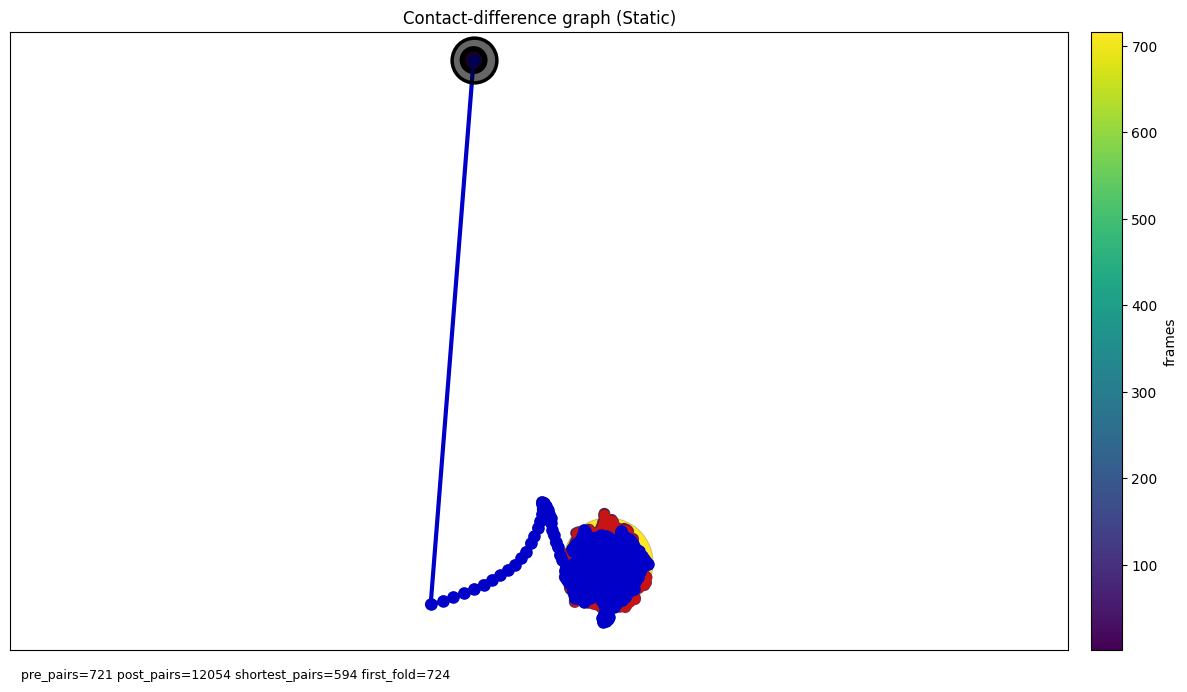

In [33]:
pdb = "/Users/kebl8116-admin/Projects/origami/data/fs-peptide/fs-peptide.pdb"
xtc = "/Users/kebl8116-admin/Projects/origami/data/fs-peptide/merged_subsampled.xtc"

contact_maps = topology.get_contact_maps(top=pdb, traj=xtc)
unique_maps, frame_to_uid, inds = topology.get_unique_maps(contact_maps)

G, counter, node_counts = graphs.build_temporal_transition_graph(frame_to_uid, inds, keep_self_loops=False)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False)

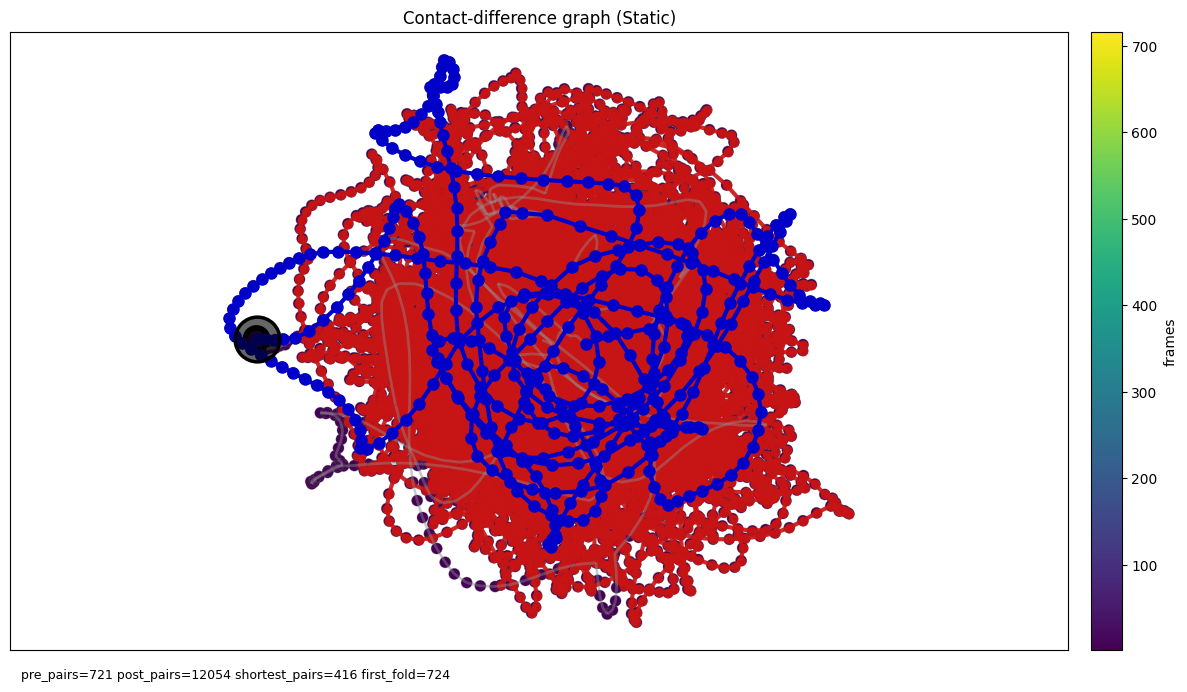

In [34]:
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False)

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/kebl8116-admin/miniconda3/envs

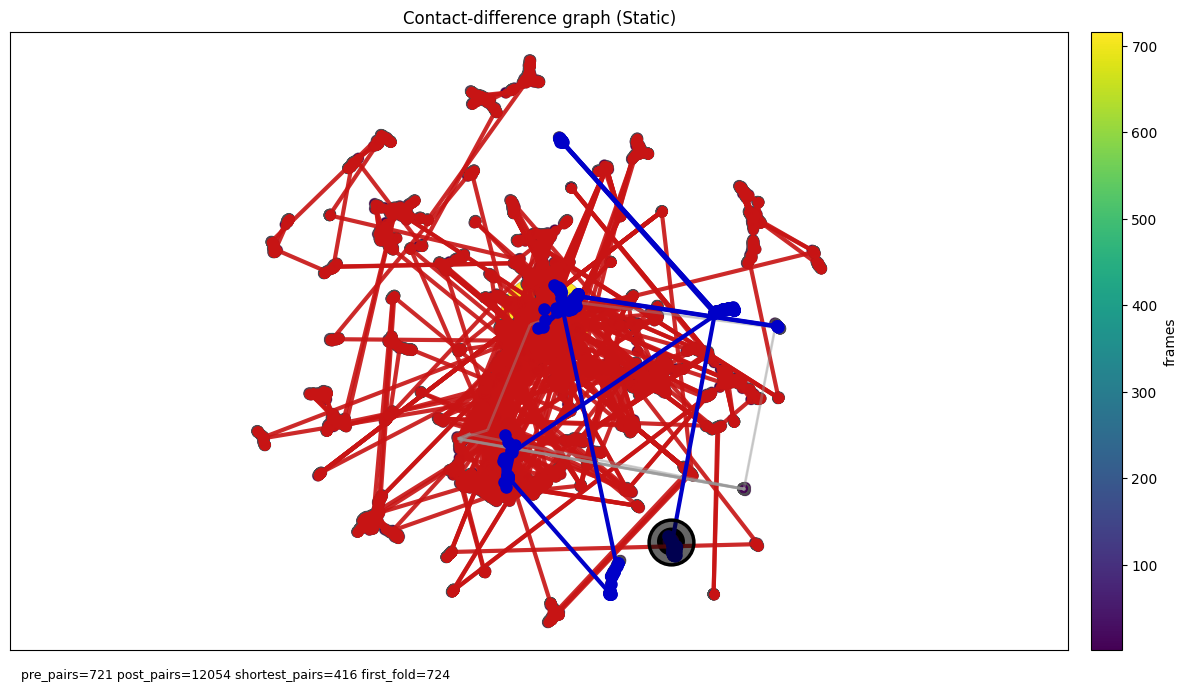

In [35]:
flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
X_emb, pca = clustering.embed_flat_bits(flat_bits, pca_n=45, umap_n=2)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)

/var/folders/bd/1_0prvlx06lcc135mt668_3r0000gs/T/ipykernel_26668/516664125.py:144: UserWarning: U=11657 large: pairwise Hamming (U^2) will be expensive and memory-heavy.
  warnings.warn(f"U={U} large: pairwise Hamming (U^2) will be expensive and memory-heavy.", UserWarning)
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  r

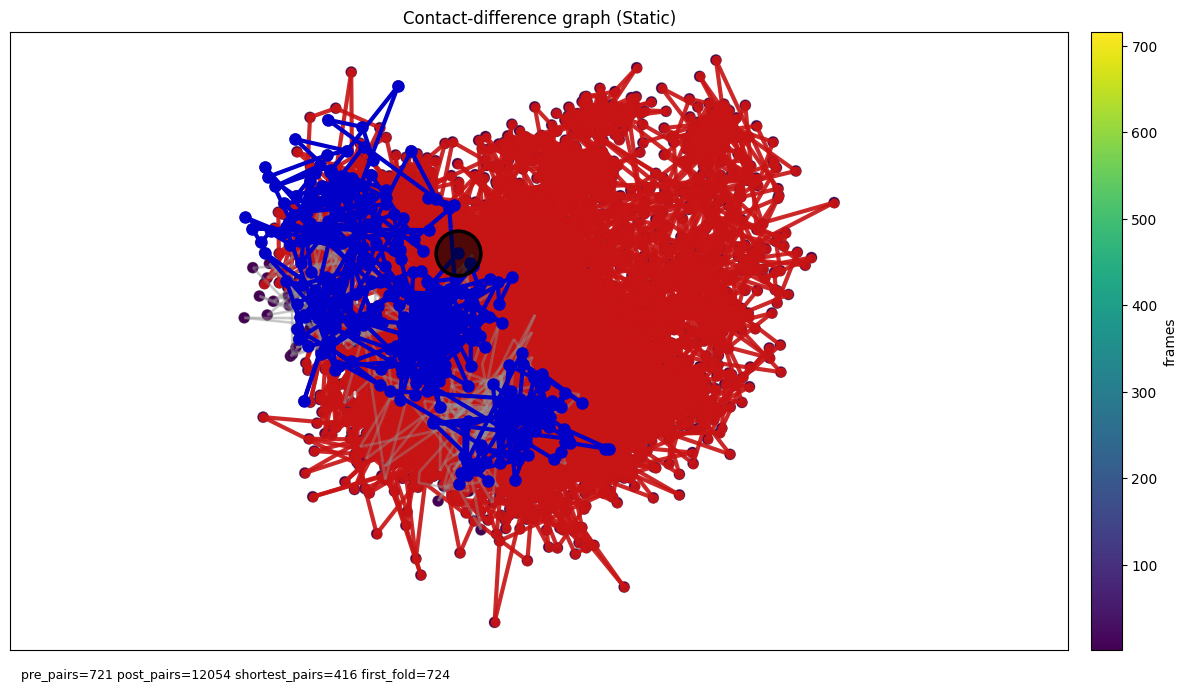

In [37]:
X_emb, labels, D = embed_and_cluster_by_hamming(ints,
                                 n_components=10,
                                 embed_method='mds',   # 'mds' or 'spectral'
                                 cluster_method='agglomerative',  # 'agglomerative' or 'hdbscan'
                                 n_clusters=None,      # only for agglomerative
                                 random_state=42,
                                 warn_threshold=4000)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)